In [1]:
%matplotlib inline

In [2]:
import tc_shgcalib

In [3]:
file='ftp://ftpbass2000.obspm.fr/pub/meudon/spc/K/1707/spectro_obspm_fullprofile_Cak_3D_20170721_113844.fits.gz'

In [4]:
from astropy.io import fits
data = fits.getdata(file,header=True)

**Print data cube FITS header**

In [5]:
data[1]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
NAXIS3  =                   94                                                  
CTYPE1  = 'X       '                                                            
CTYPE2  = 'Y       '                                                            
CTYPE3  = 'wavelength'                                                          
CUNIT1  = 'arcseconds'                                                          
CUNIT2  = 'arcseconds'                                                          
CUNIT3  = 'Angstrom'                                                            
FILENAME= 'spectro_obspm_ful

**Perform the profile fit and return fit parameters (P) and the updated file header (h) :**

In [6]:
P,h=tc_shgcalib.profilefit(data,update=True)

**Print the updated FITS header (FITS file not changed) :**

In [7]:
h

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
NAXIS3  =                   94                                                  
CTYPE1  = 'X       '                                                            
CTYPE2  = 'Y       '                                                            
CTYPE3  = 'wavelength'                                                          
CUNIT1  = 'arcseconds'                                                          
CUNIT2  = 'arcseconds'                                                          
CUNIT3  = 'Angstrom'                                                            
FILENAME= 'spectro_obspm_ful

**Create the observed spectrum from data cube :**

In [8]:
specobs=tc_shgcalib.make_specobs(data)

**Get the reference spectrum for the given wavelength :**

In [9]:
ref=tc_shgcalib.load_specref(WAVELNTH=h['WAVELNTH'])

**Plot the observed and soothed reference spectra (y-scale is observed intesity):**

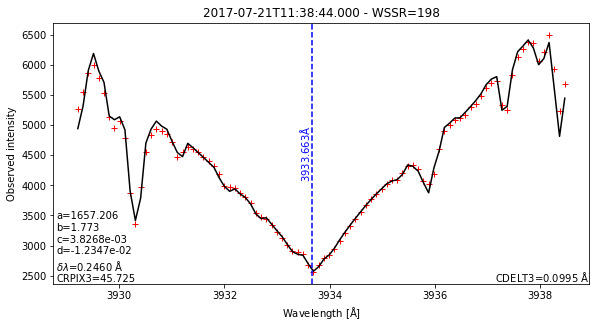

In [10]:
fig=tc_shgcalib.plot_fit(specobs,ref,*P.values(),title=h['DATE_OBS'])[0]

**Plot the observed and full resolution reference spectra (y-scale is reference intesity):**

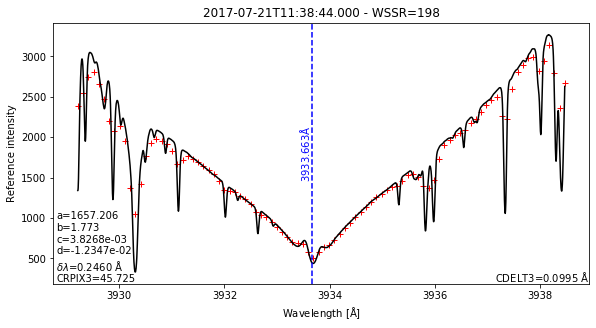

In [11]:
fig2=tc_shgcalib.plot_fit(specobs,ref,*P.values(),title=h['DATE_OBS'],yscale='ref_full')[0]